In [83]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools as it

sns.set(context='paper', 
        style='ticks', 
        font_scale=1,
        font='serif',)

We first need to read the values from the PHOIBLE database. Values contains information about phonemes, and languages contains detailed information about languages.

In [84]:
values = pd.read_csv('data/values.csv')
languages = pd.read_csv('data/languages.csv')

In [85]:
values[values['Marginal'] != True].shape

(104125, 10)

In [86]:
values.head(10)

,ID,Language_ID,Parameter_ID,Value,Code_ID,Comment,Source,Marginal,Allophones,Contribution_ID
0,1,kore1280,72FB536ACFF408163656BBCDAFCAC6F6,a,NaN,NaN,cho1967;martin1951;martin1954;martinlee1969;ki...,NaN,a,1
1,2,kore1280,2F272C9C5FA2DA70706B565B2DC46DE8,aː,NaN,NaN,cho1967;martin1951;martin1954;martinlee1969;ki...,NaN,aː,1
2,3,kore1280,B6D180EA250E6FBDE82C3D1F1BB4A39C,æ,NaN,NaN,cho1967;martin1951;martin1954;martinlee1969;ki...,NaN,ɛ æ,1
3,4,kore1280,CB37024CEAE9409F30FC756C0578E93C,æː,NaN,NaN,cho1967;martin1951;martin1954;martinlee1969;ki...,NaN,æː,1
4,5,kore1280,199408E3D0668F10F475143F0E8CC0CB,e,NaN,NaN,cho1967;martin1951;martin1954;martinlee1969;ki...,NaN,e,1
5,6,kore1280,6DD56E3A80E90C3B1F5AC7AC45CE8180,eː,NaN,NaN,cho1967;martin1951;martin1954;martinlee1969;ki...,NaN,eː,1
6,7,kore1280,80E0B47CF9A1F002B35B6AAB49574C61,ɤ,NaN,NaN,cho1967;martin1951;martin1954;martinlee1969;ki...,NaN,ɤ,1
7,8,kore1280,5C19A8FEDB2B0124AA7C66E689586A64,ɤː,NaN,NaN,cho1967;martin1951;martin1954;martinlee1969;ki...,NaN,ɤː,1
8,9,kore1280,E7FBD92350B3CA8B7B5D77E36A607068,h,NaN,NaN,cho1967;martin1951;martin1954;martinlee1969;ki...,NaN,ç h ɦ,1
9,10,kore1280,F0585BB57111C322D6E7DABB0D01F9EA,i,NaN,NaN,cho1967;martin1951;martin1954;martinlee1969;ki...,NaN,i,1


In [87]:
languages.head(10)

,ID,Name,Macroarea,Latitude,Longitude,Glottocode,ISO639P3code,Family_Glottocode,Family_Name
0,kore1280,Korean,Eurasia,37.500000,128.00000,kore1280,kor,kore1284,Koreanic
1,kett1243,Ket,Eurasia,63.755100,87.54660,kett1243,ket,yeni1252,Yeniseian
2,lakk1252,Lak,Eurasia,42.132800,47.08090,lakk1252,lbe,nakh1245,Nakh-Daghestanian
3,kaba1278,Kabardian,Eurasia,43.508200,43.39180,kaba1278,kbd,abkh1242,Abkhaz-Adyge
4,nucl1302,Georgian,Eurasia,41.850397,43.78613,nucl1302,kat,kart1248,Kartvelian
5,buru1296,Burushaski,Eurasia,36.216100,74.82360,buru1296,bsk,NaN,NaN
6,kuru1302,Kurukh,Eurasia,24.464400,86.46570,kuru1302,kru,drav1251,Dravidian
7,telu1262,Telugu,Eurasia,16.452900,78.70240,telu1262,tel,drav1251,Dravidian
8,kota1263,Kota (India),Eurasia,11.497800,76.93870,kota1263,kfe,drav1251,Dravidian
9,mund1320,Mundari,Eurasia,25.039100,87.17920,mund1320,unr,aust1305,Austroasiatic


In the values df, Language_ID corresponds to one language, but it's the Contribution_ID that we're after -- it indicates one unique set of phonemes per language:

In [88]:
values['Language_ID'].nunique()

2186

In [89]:
values['Contribution_ID'].nunique()

3020

Now let's build a list of families with the corresponding amount of languages:

In [90]:
# count families by n of languages
n_langs = languages.groupby('Family_Name').size()
# sort by n of languages
n_langs = n_langs.sort_values(ascending=False)
# remove families the are less than 4 languages
n_langs = n_langs[n_langs > 3]

print(n_langs.index, n_langs.shape)

Index(['Atlantic-Congo', 'Pama-Nyungan', 'Indo-European', 'Austronesian',
       'Afro-Asiatic', 'Sino-Tibetan', 'Tupian', 'Mande', 'Arawakan',
       'Austroasiatic', 'Dravidian', 'Uralic', 'Nuclear Trans New Guinea',
       'Nilotic', 'Pano-Tacanan', 'Cariban', 'Quechuan', 'Central Sudanic',
       'Turkic', 'Nuclear-Macro-Je', 'Tucanoan', 'Tai-Kadai', 'Otomanguean',
       'Uto-Aztecan', 'Gunwinyguan', 'Nakh-Daghestanian', 'Mayan', 'Mongolic',
       'Salishan', 'Chibchan', 'Nyulnyulan', 'Ta-Ne-Omotic',
       'Athabaskan-Eyak-Tlingit', 'Bookkeeping', 'Mirndi', 'Worrorran',
       'Kadugli-Krongo', 'Sepik', 'Heibanic', 'Nuclear Torricelli', 'Chocoan',
       'Ijoid', 'Mixe-Zoque', 'Algic', 'Western Daly', 'Nambiquaran',
       'Narrow Talodi', 'Iwaidjan Proper', 'Arawan', 'Tungusic',
       'Kiowa-Tanoan', 'Guaicuruan', 'Surmic', 'Eskimo-Aleut', 'Nadahup',
       'Mangarrayi-Maran', 'Maningrida', 'Matacoan', 'Kartvelian', 'Iroquoian',
       'Muskogean', 'Zaparoan', 'Huitotoan', 'So

Now let's write a function that will create a phoneme-language matrix for each family:

In [112]:
def phoneme_matrix(family_name, languages, values):
    '''
    Function for creating the phoneme matrix for a given family.
    '''

    # Filter languages by family name
    lgs = languages.loc[languages['Family_Name'] == family_name, 'ID'].values
    
    # Select one Contribution_ID per language (so that we do not include duplicate data)
    selected_contributions = values[values['Language_ID'].isin(lgs)]
    selected_contributions = selected_contributions.groupby('Language_ID')['Contribution_ID']
    # NB: this is important! I am randomly choosing one contribution per language if there are multiple.
    selected_contributions = selected_contributions.apply(lambda x: np.random.choice(x.unique())).values
    
    # Extract phonemes for selected contributions
    lang_phonemes = {c: values.loc[values['Contribution_ID'] == c, 'Value'].values for c in selected_contributions}
    
    # Collect all unique phonemes
    all_phonemes = set(phoneme for phonemes in lang_phonemes.values() for phoneme in phonemes)
    phoneme_index = {phoneme: i for i, phoneme in enumerate(all_phonemes)}
    
    # Create binary matrix using NumPy
    matrix = np.zeros((len(lang_phonemes), len(all_phonemes)), dtype=int)
    orig_order = list(lang_phonemes.keys())
    
    for i, lang in enumerate(orig_order):
        for phoneme in lang_phonemes[lang]:
            matrix[i, phoneme_index[phoneme]] = 1

    # match language to contribution_id from orig_order
    # lang_ids = 

    return matrix, phoneme_index

In [113]:
def sort_matrix(M, iter):
    '''
    Sorting matrix for the nestedness display.
    '''
    row_order = np.arange(M.shape[0])
    col_order = np.arange(M.shape[1])
    
    for _ in range(iter):
        # sort the matrix by the sum of each column 
        col_order = np.argsort(M.sum(axis=0))[::-1]
        M = M[:, col_order]
        
        # sort the matrix by the sum of each row
        row_order = np.argsort(M.sum(axis=1))[::-1]
        M = M[row_order, :]
    
    return M, row_order, col_order

Let's look at Kartvelian again:

In [118]:
p_n, p = phoneme_matrix('Saharan', languages, values)
m, r, c = sort_matrix(p_n, 1000)

In [119]:
ordered_phonemes = [list(p.keys())[i] for i in c]

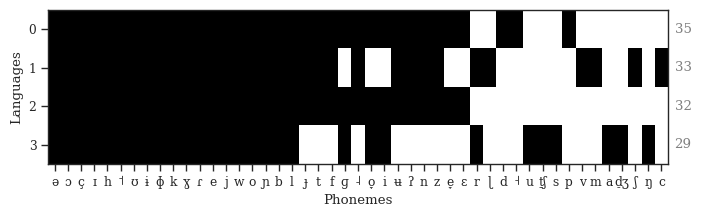

In [122]:
plt.figure(figsize=(8, 2))

plt.imshow(m, 
           cmap='binary', aspect='auto')

for i, row in enumerate(m):
    plt.text(m.shape[1], i, row.sum(), 
             va='center', color='grey')
    
# add ordered phonemes on the x axis
plt.xticks(np.arange(len(ordered_phonemes)), ordered_phonemes, rotation=0)

plt.xlabel('Phonemes')
plt.ylabel('Languages')

plt.show()

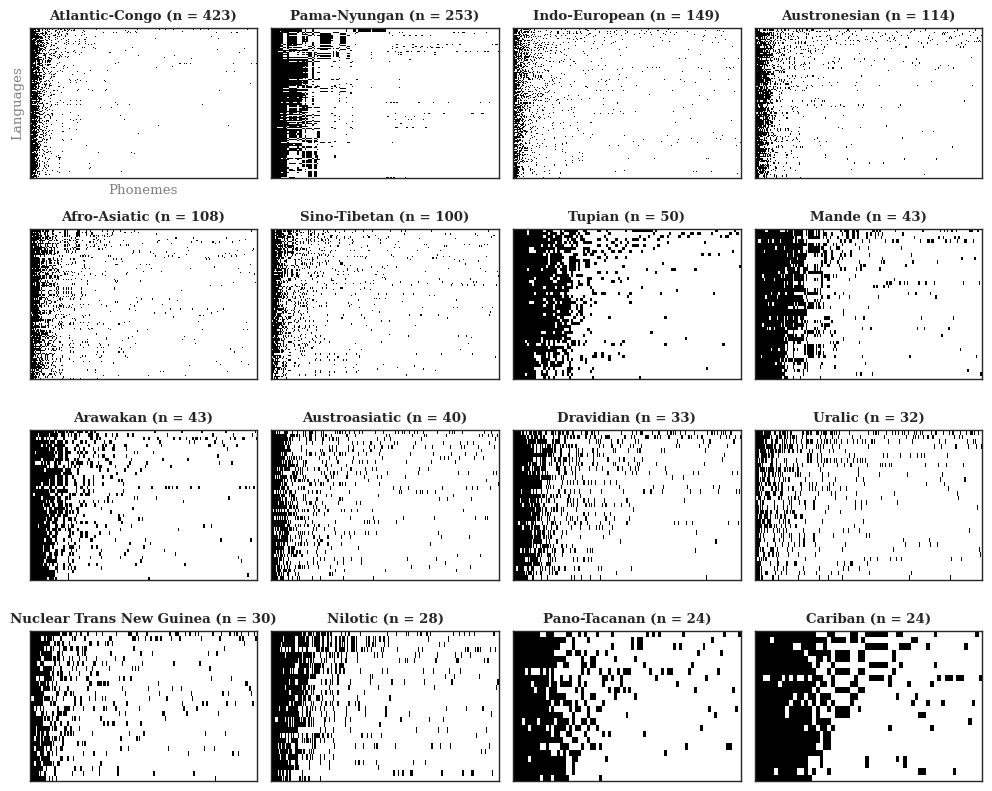

In [124]:
# plot matrices for the 12 biggest families
biggest_families = n_langs.head(16).index

fig, ax = plt.subplots(4, 4, figsize=(10, 8))

for i, family in enumerate(biggest_families):
    matrix, _ = phoneme_matrix(family, languages, values)
    matrix, _, _ = sort_matrix(matrix, 100)
    
    ax_ = ax[i//4, i%4]
    ax_.imshow(matrix, cmap='binary', 
               aspect='auto', 
               interpolation='none')
    ax_.set_title(f'{family} (n = {matrix.shape[0]})',
                  fontweight='bold')
    if i == 0:
        ax_.set_xlabel('Phonemes', color='gray')
        ax_.set_ylabel('Languages', color='gray')
    # remove x and y ticks
    ax_.set_xticks([])
    ax_.set_yticks([])

plt.tight_layout()
plt.show()

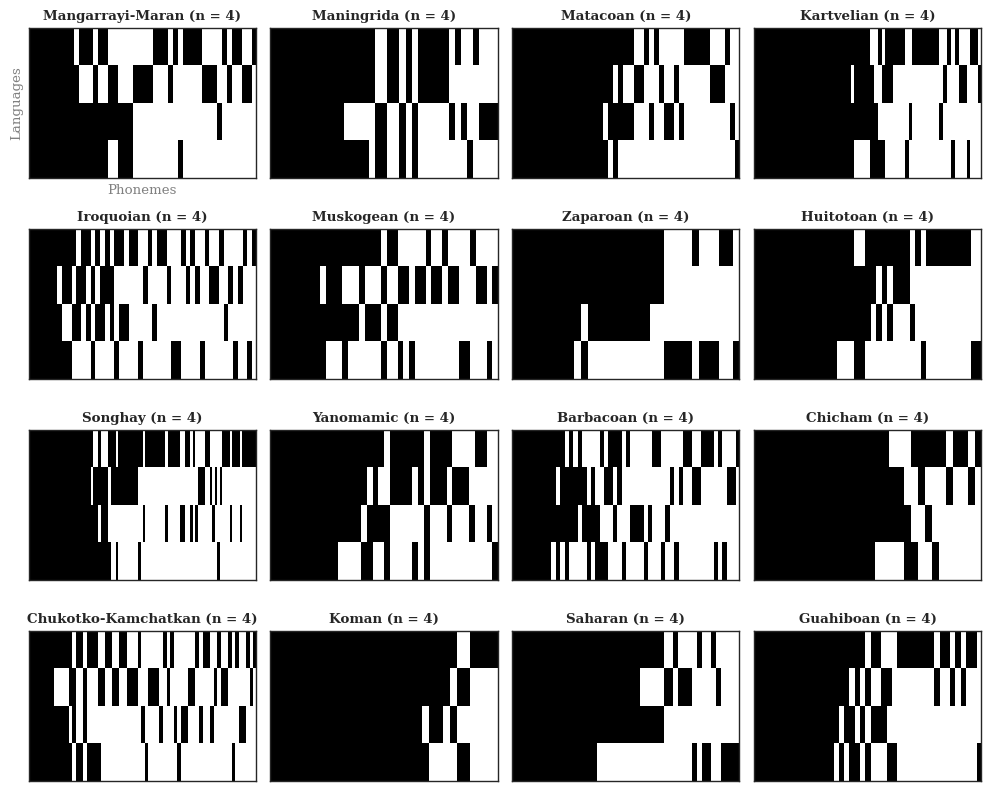

In [131]:
# plot matrices for the 16 smallest families
smallest_families = n_langs.tail(16).index

fig, ax = plt.subplots(4, 4, figsize=(10, 8))

for i, family in enumerate(smallest_families):
    matrix, _ = phoneme_matrix(family, languages, values)
    matrix, _, _ = sort_matrix(matrix, 100)
    
    ax_ = ax[i//4, i%4]
    ax_.imshow(matrix, cmap='binary', 
               aspect='auto', 
               interpolation='none')
    ax_.set_title(f'{family} (n = {matrix.shape[0]})',
                  fontweight='bold')
    if i == 0:
        ax_.set_xlabel('Phonemes', color='gray')
        ax_.set_ylabel('Languages', color='gray')
    # remove x and y ticks
    ax_.set_xticks([])
    ax_.set_yticks([])

plt.tight_layout()
plt.show()